In [1]:
# ======================
# !!! PLOT TAU TABLE !!!
# ======================

from astropy.io import fits
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns

sns.set()

path = '/home/ambra/Desktop/cluster-morgana/'
fixed = path + 'gilmore_tau_fixed.csv'
fiducial = path + 'gilmore_tau_fiducial.csv'

file = [fiducial, fixed]
ls = ['-', '-.']
fontsize=12
labels = ['0.01', '0.1', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ['b', 'g', 'r', 'y', 'm', 'gray']

fig = plt.figure()
ax = plt.subplot(111, xscale='log', yscale='log')
plt.rc('text', usetex=True)
sns.set()

for i in range(len(file)) :
    df = pd.read_csv(file[i])
    cols = list(df.columns)
    df.dropna()

    z001 = np.array(df['z=0.01'])
    z01 = np.array(df['0.10'])
    z1 = np.array(df['1.0'])
    z2 = np.array(df['2.0'])
    z3 = np.array(df['3.0'])
    z4 = np.array(df['4.0'])
    z5 = np.array(df['5.0'])
    z6 = np.array(df['6.0'])
    z7 = np.array(df['7.0'])
    z8 = np.array(df['8.0'])
    z9 = np.array(df['9.0'])
    E = np.array(df[cols[0]])

    z = [z001, z01, z1, z2, z3, z4]

    for j in range(len(z)) :
        plt.plot(E/1e3, z[j], label='z='+labels[j], ls=ls[i], c=colors[j]) 
        plt.xlabel('E (GeV)', fontsize=fontsize)
        plt.ylabel('$\\tau$', fontsize=18)
        plt.title('optical depth', fontsize=fontsize)

    plt.legend(loc=0, fontsize=fontsize) if i == 0 else None
    

plt.tight_layout()
plt.savefig('gilmore_tau.png')
plt.show()


<Figure size 640x480 with 1 Axes>

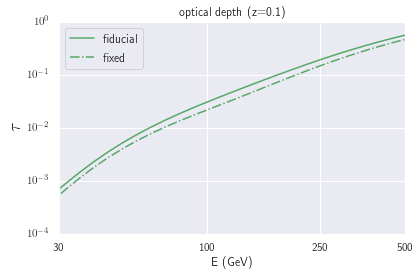

In [2]:
fig = plt.figure()
ax = plt.subplot(111, xscale='log', yscale='log')
plt.rc('text', usetex=True)
sns.set()

model = ['fiducial', 'fixed']

for i in range(len(file)) :
    df = pd.read_csv(file[i])
    cols = list(df.columns)
    df.dropna()

    z01 = np.array(df['0.10'])
    E = np.array(df[cols[0]])

    z = [z01]

    for j in range(len(z)) :
        plt.plot(E/1e3, z[j], label='%s' %model[i], ls=ls[i], c='g') 
        plt.xlabel('E (GeV)', fontsize=fontsize)
        plt.ylabel('$\\tau$', fontsize=18)
        plt.title('optical depth (z=0.1)', fontsize=fontsize)

    plt.legend(loc=0, fontsize=fontsize) 
    plt.xlim([30, 500])
    plt.ylim([1e-4, 1e0])
    plt.xticks((30, 100, 250, 500), ('30', '100', '250', '500')) 

plt.tight_layout()
plt.savefig('gilmore_tau_z01.png')
plt.show()


In [4]:
import numpy as np
flux = 2.3e-20
tau = 3e-6
f = flux * np.exp(-tau)
print(f)

2.2999931000103498e-20


In [5]:
print(np.exp(-tau))

0.9999970000045
